# Loan predictions

## Problem Statement

automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling as pp



In [2]:
df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
## to extract the data summary use pp.profilereport (takes longer to run)
#loan_report=pp.ProfileReport(df)
#loan_report.to_file('lone.html')

### Imputing missing values

In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# credit_history check
df[df['Credit_History']==1]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


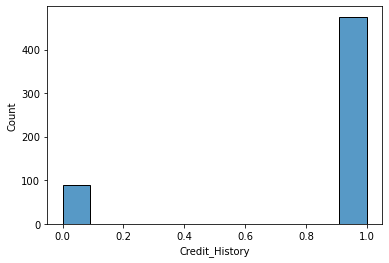

In [5]:
sns.histplot(x='Credit_History', data=df)  ##visulization of Credit History 

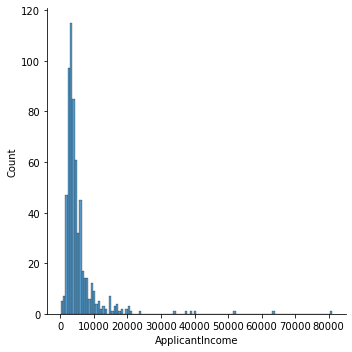

In [6]:
## applicant income distribution
sns.displot(df['ApplicantIncome'])

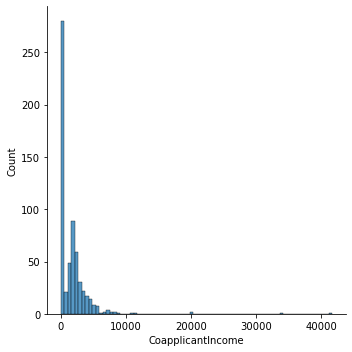

In [7]:
sns.displot(df['CoapplicantIncome'])

In [8]:
df['ApplicantIncome'].mean()

5403.459283387622

In [9]:
print(f'The applicant income mean and median are {df.ApplicantIncome.mean()},{df.ApplicantIncome.median()} ')

The applicant income mean and median are 5403.459283387622,3812.5 


In [12]:
print(f'The coapplicant income mean and median are {df.CoapplicantIncome.mean()},{df.CoapplicantIncome.median()} ')

The coapplicant income mean and median are 1621.245798027101,1188.5 


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



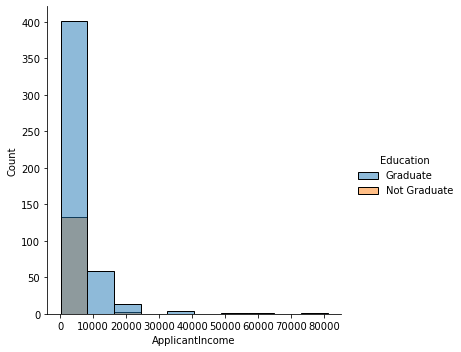

In [10]:
sns.displot(df, x='ApplicantIncome', hue='Education', bins=10)


Look at box plots to understand the distributions. 

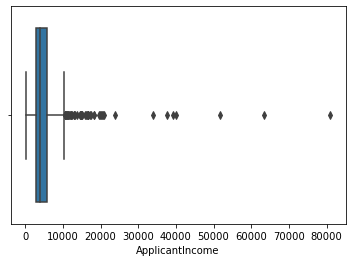

In [11]:
sns.boxplot(df['ApplicantIncome'])

Look at the distribution of income segregated  by `Education`

Look at the histogram and boxplot of LoanAmount

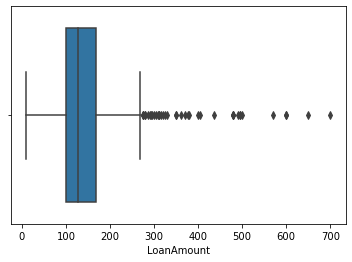

In [15]:
sns.boxplot(df['LoanAmount'])

In [14]:
# Use Z_score to generate the outlier list
aincome_mean=df['ApplicantIncome'].mean()
aincome_std=df['ApplicantIncome'].std()
income_outlier=[]
for i in df['ApplicantIncome']:
     z=(i-aincome_mean)/aincome_std
     if z>3:
         income_outlier.append(i)
print(income_outlier)


[23803, 39999, 51763, 33846, 39147, 63337, 81000, 37719]


In [15]:
maximum_income=3*aincome_std+aincome_mean
maximum_income

23730.584303549145

In [16]:
# Assign the income outlier to maximum_income
df['ApplicantIncome']= df['ApplicantIncome'].apply(lambda x:maximum_income if x in income_outlier else x)

In [18]:
# use Z_score to generate the Loan Amount outlier list
loan_mean=df['LoanAmount'].mean()
loan_std=df['LoanAmount'].std()
loan_outlier=[]
for i in df['LoanAmount']:
     z=(i-loan_mean)/loan_std
     if z>3:
         loan_outlier.append(i)
print(loan_outlier)

[650.0, 600.0, 700.0, 495.0, 436.0, 480.0, 490.0, 570.0, 405.0, 500.0, 480.0, 480.0, 600.0, 496.0]


In [19]:
# assign the loan outlier to maximum loan
maximum_loan=3*loan_std+loan_mean
df['LoanAmount']=df['LoanAmount'].apply(lambda x: maximum_loan if x in loan_outlier else x)

In [20]:
# Doing the same transformation for CoapplicantIncome: identify the outlier and assign the outlier to z=3 value
coincome_mean=df['CoapplicantIncome'].mean()
coincome_std=df['CoapplicantIncome'].std()
coincome_max=3*coincome_std+coincome_mean
df['CoapplicantIncome']=df['CoapplicantIncome'].apply(lambda x: coincome_max if x>coincome_max else x)


In [22]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

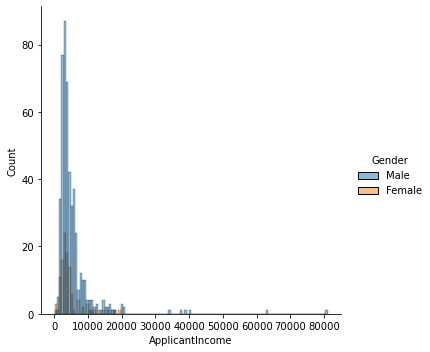

In [23]:
sns.displot(df, x='ApplicantIncome', hue='Gender')

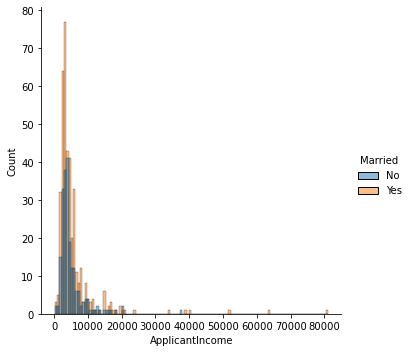

In [24]:
sns.displot(df, x='ApplicantIncome', hue='Married')

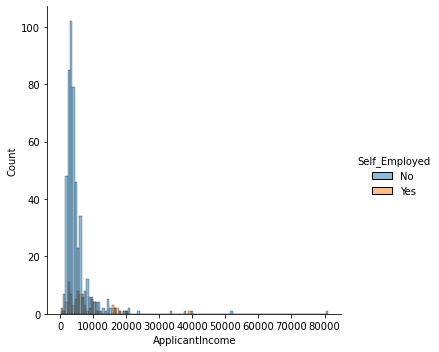

In [25]:
sns.displot(df, x='ApplicantIncome', hue='Self_Employed')

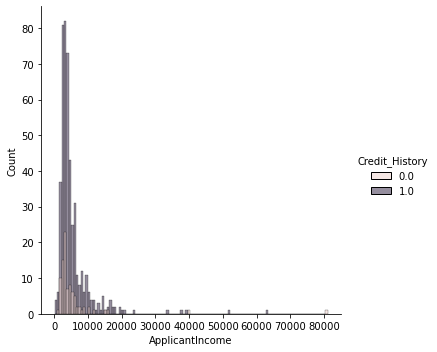

In [26]:
sns.displot(df, x='ApplicantIncome', hue='Credit_History')

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [27]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
df1=df.copy()

In [29]:
mode_col=['Gender','Married', 'Self_Employed', 'Credit_History']

In [30]:
for col in mode_col:
    df1[col]=df1[col].fillna(df1[col].mode()[0])

In [31]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
# assign null depends as o
df1['Dependents'].fillna(0, inplace=True)

In [33]:
# assign mean value for loanamount and loan_amount_term
df1['LoanAmount'].fillna(value=df1['LoanAmount'].mean(), inplace=True)
df1['Loan_Amount_Term'].fillna(value=df1['Loan_Amount_Term'].mean(), inplace=True)

In [34]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

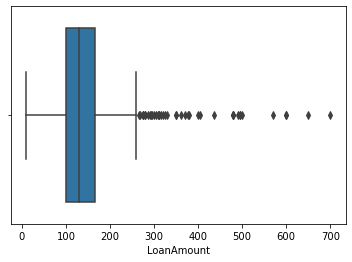

In [35]:
sns.boxplot(df1['LoanAmount'])

In [36]:
df1['LoanAmount']=np.log(df1['LoanAmount'])

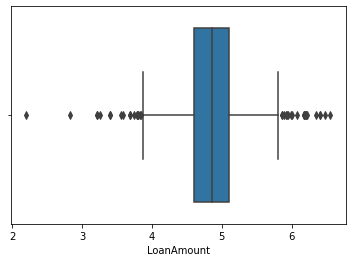

In [37]:
sns.boxplot(df1['LoanAmount'])

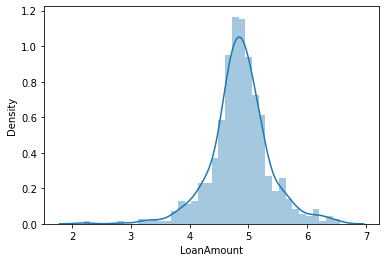

In [38]:
sns.distplot(df1['LoanAmount'])

Combine both incomes as total income and take a log transformation of the same.

In [39]:
df1['Total_Income']=df1['ApplicantIncome']+df1['CoapplicantIncome']

In [40]:
df1['Total_Income']=np.log(df1['Total_Income'])

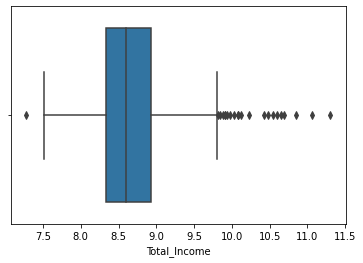

In [41]:
sns.boxplot(df1['Total_Income'])


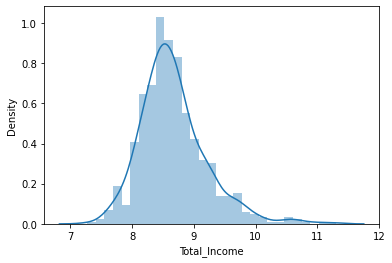

In [42]:
sns.distplot(df1['Total_Income'])

## 4. Building a Predictive Model

In [43]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.986426,360.0,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,N,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,360.0,1.0,Urban,Y,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.948760,360.0,1.0,Urban,Y,8.699515


In [44]:
df1['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [45]:
df1['Loan_Status'].describe()

count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

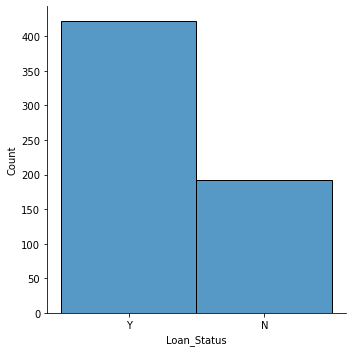

In [46]:
sns.displot(df1['Loan_Status'])

In [47]:
df2=df1.drop(columns=['ApplicantIncome','CoapplicantIncome'])

In [48]:
df2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Total_Income'],
      dtype='object')

In [49]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder=LabelEncoder()
scaler=StandardScaler()

In [50]:
cat_cols=['Gender', 'Married','Education','Self_Employed','Credit_History','Property_Area', 'Loan_Status']
num_cols=['Dependents','LoanAmount', 'Loan_Amount_Term', 'Total_Income']

In [51]:
df2['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [52]:
df2[cat_cols]=df2[cat_cols].apply(encoder.fit_transform)

In [53]:
df2['Dependents']=df2['Dependents'].apply(lambda x:3 if x=='3+' else x)

In [54]:
# Scale the numerical values
df2[num_cols]=scaler.fit_transform(df2[num_cols])

In [55]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,-0.737806,0,0,0.250640,0.279851,1,2,1,0.008468
1,LP001003,1,1,0.253470,0,0,-0.020226,0.279851,1,0,0,0.082903
2,LP001005,1,1,-0.737806,0,1,-1.355202,0.279851,1,2,1,-1.217363
3,LP001006,1,1,-0.737806,1,0,-0.150299,0.279851,1,2,1,-0.301273
4,LP001008,1,0,-0.737806,0,0,0.174727,0.279851,1,2,1,0.055266
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,-0.737806,0,0,-1.208025,0.279851,1,0,1,-1.279607
610,LP002979,1,1,2.236021,0,0,-2.364484,-2.518655,1,0,1,-0.641153
611,LP002983,1,1,0.253470,0,0,1.353011,0.279851,1,2,1,0.653699
612,LP002984,1,1,1.244745,0,0,0.743783,0.279851,1,2,1,0.485168


In [56]:
df3=df2.drop(columns=['Loan_Status', 'Loan_ID'])

In [57]:
df3

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,0,-0.737806,0,0,0.250640,0.279851,1,2,0.008468
1,1,1,0.253470,0,0,-0.020226,0.279851,1,0,0.082903
2,1,1,-0.737806,0,1,-1.355202,0.279851,1,2,-1.217363
3,1,1,-0.737806,1,0,-0.150299,0.279851,1,2,-0.301273
4,1,0,-0.737806,0,0,0.174727,0.279851,1,2,0.055266
...,...,...,...,...,...,...,...,...,...,...
609,0,0,-0.737806,0,0,-1.208025,0.279851,1,0,-1.279607
610,1,1,2.236021,0,0,-2.364484,-2.518655,1,0,-0.641153
611,1,1,0.253470,0,0,1.353011,0.279851,1,2,0.653699
612,1,1,1.244745,0,0,0.743783,0.279851,1,2,0.485168


In [58]:
feat_names=df3.columns

In [59]:
y=df2['Loan_Status'].values
X=df3.values


In [60]:
X

array([[ 1.        ,  0.        , -0.73780632, ...,  1.        ,
         2.        ,  0.00846848],
       [ 1.        ,  1.        ,  0.25346957, ...,  1.        ,
         0.        ,  0.08290346],
       [ 1.        ,  1.        , -0.73780632, ...,  1.        ,
         2.        , -1.21736328],
       ...,
       [ 1.        ,  1.        ,  0.25346957, ...,  1.        ,
         2.        ,  0.65369887],
       [ 1.        ,  1.        ,  1.24474546, ...,  1.        ,
         2.        ,  0.48516845],
       [ 0.        ,  0.        , -0.73780632, ...,  0.        ,
         1.        , -0.43936693]])

In [61]:
## Split the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

In [63]:
# rebalance the data
smote=SMOTE()
X_sam,y_sam=smote.fit_sample(X_train, y_train)


In [64]:
#Logistic regression
lg=LogisticRegression()
 #without smote
lg.fit(X_train, y_train)
y_lg=lg.predict(X_test)
print('logistic-without smote', metrics.classification_report(y_test, y_lg))


logistic-without smote               precision    recall  f1-score   support

           0       0.86      0.37      0.52        51
           1       0.80      0.98      0.88       134

    accuracy                           0.81       185
   macro avg       0.83      0.68      0.70       185
weighted avg       0.82      0.81      0.78       185



In [65]:
# lg with the smote
lg.fit(X_sam, y_sam)
y_lgs=lg.predict(X_test)
print(metrics.classification_report(y_test, y_lgs))

              precision    recall  f1-score   support

           0       0.73      0.43      0.54        51
           1       0.81      0.94      0.87       134

    accuracy                           0.80       185
   macro avg       0.77      0.69      0.71       185
weighted avg       0.79      0.80      0.78       185



In [66]:
## Random Forest without smote
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf=rf.predict(X_test)
print(metrics.classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.56      0.43      0.49        51
           1       0.80      0.87      0.84       134

    accuracy                           0.75       185
   macro avg       0.68      0.65      0.66       185
weighted avg       0.74      0.75      0.74       185



In [67]:
# based on random_forest modeling, find the most import features
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feat_names),reverse=True))

[(0.2958, 'Credit_History'), (0.25, 'Total_Income'), (0.2108, 'LoanAmount'), (0.0578, 'Loan_Amount_Term'), (0.0475, 'Property_Area'), (0.0456, 'Dependents'), (0.027, 'Married'), (0.0251, 'Education'), (0.0207, 'Self_Employed'), (0.0197, 'Gender')]


In [68]:
## Random Forest with smote
rf.fit(X_sam, y_sam)
y_rfs=rf.predict(X_test)
print(metrics.classification_report(y_test, y_rfs))

              precision    recall  f1-score   support

           0       0.55      0.47      0.51        51
           1       0.81      0.85      0.83       134

    accuracy                           0.75       185
   macro avg       0.68      0.66      0.67       185
weighted avg       0.74      0.75      0.74       185



In [69]:
# using SVC without resampling
svc=SVC()
svc.fit(X_train, y_train)
y_svc=svc.predict(X_test)
print(metrics.classification_report(y_test, y_svc))

              precision    recall  f1-score   support

           0       0.65      0.39      0.49        51
           1       0.80      0.92      0.85       134

    accuracy                           0.77       185
   macro avg       0.72      0.66      0.67       185
weighted avg       0.76      0.77      0.75       185



In [70]:
# using svc with the smote
svc.fit(X_sam, y_sam)
y_svcs=svc.predict(X_test)
print(metrics.classification_report(y_test, y_svcs))

              precision    recall  f1-score   support

           0       0.58      0.41      0.48        51
           1       0.80      0.89      0.84       134

    accuracy                           0.76       185
   macro avg       0.69      0.65      0.66       185
weighted avg       0.74      0.76      0.74       185



Try paramater grid search to improve the results

In [71]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.01,0.1, 1, 10]}
gsc= GridSearchCV(svc,parameters)
grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
print(best_params)


{'C': 0.1, 'kernel': 'linear'}


In [72]:
y_best=gsc.predict(X_test)
print(metrics.classification_report(y_test, y_best))

              precision    recall  f1-score   support

           0       0.86      0.37      0.52        51
           1       0.80      0.98      0.88       134

    accuracy                           0.81       185
   macro avg       0.83      0.68      0.70       185
weighted avg       0.82      0.81      0.78       185



In [272]:
# Grid Search for Random Forest
param_grid = { 
    'n_estimators': [100,200,300,400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc=GridSearchCV(rf, param_grid=param_grid, cv=5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 200}

In [274]:
y_best_rf=CV_rfc.predict(X_test)
print(metrics.clas call sification_report(y_test, y_best_rf))

              precision    recall  f1-score   support

           0       0.97      0.61      0.75        56
           1       0.85      0.99      0.92       129

    accuracy                           0.88       185
   macro avg       0.91      0.80      0.83       185
weighted avg       0.89      0.88      0.87       185



## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [9]:
import pandas as pd 
import numpy as np  
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import metrics

In [10]:
# reading the raw data and split the dataset for train-test
df=pd.read_csv('data.csv')
y = df['Loan_Status'].apply(lambda x:1 if x=='Y' else 0)
X=df.drop(columns=['Loan_Status'])

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [11]:
## Transform DataFrame to create a new column ('Total Income')
class DataframeFunctionTransformer():
    def __init__(self, func):
        self.func = func
    def transform(self, input_df, **transform_params):
        return self.func(input_df)
    def fit(self, X, y=None, **fit_params):
       # print(X) # used this for testing
        return self
# this function takes a dataframe as input and
# returns a modified version thereof
def process_dataframe(input_df):
    input_df["Total_Income"] = (input_df["ApplicantIncome"]+input_df['CoapplicantIncome']).map(lambda i: np.log(i) if i>0 else 0)
    input_df['LoanAmount']=input_df['LoanAmount'].map(lambda i: np.log(i) if i >0 else 0)
    return input_df


In [14]:
## Select the features  --use this class to select the features used for modeling
class FeatureSelector:
    def __init__(self, feats):
        self.feats = feats
    def fit(self, X, y=None):
        pass
    def transform(self, X, y=None):
        return X[self.feats]
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
# features used for modeling, drop the Gender, Married, and add a new column 'total Income'
feats=['Dependents',
 'Education',
 'Self_Employed',
  'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area', 'Total_Income']

In [15]:
# replace the mean for num_cols and 'most_frequent' for cat columns, using label_encode for the categorical data, and scaler the numerical columns) using ColumnTransfer
num_transformer=Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])
cat_transformer=Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder())])

In [16]:
# Step_1 Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, ['LoanAmount', 'Loan_Amount_Term', 'Total_Income']),
        ('cat', cat_transformer, ['Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area'])])

In [18]:
pipe1=Pipeline(steps=[('Dataframe', DataframeFunctionTransformer(process_dataframe)),
 ('features',FeatureSelector(feats)), ('preprocessing', preprocessor), ('feature_selection', SelectKBest(k=5)),
 ('model', RandomForestClassifier())])
pipe1.fit(X_train, y_train)
y_cfc=pipe1.predict(X_test)
y_cfc=pipe1.predict(X_test)
print('modeling f1 score:', metrics.f1_score(y_test, y_cfc))
print(f'The RandomForest has the precision score and recall score of {metrics.precision_score(y_test, y_cfc)},{metrics.recall_score(y_test, y_cfc)}')


modeling f1 score: 0.8571428571428571
The RandomForest has the precision score and recall score of 0.7572815533980582,0.9873417721518988


In [19]:
## Modeling pipeline - using for loop to loop through model selections
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifiers = [KNeighborsClassifier(3), SVC(kernel="rbf", C=0.025, probability=True),  
DecisionTreeClassifier(), RandomForestClassifier(),GradientBoostingClassifier()]

for classifier in classifiers:
    pipe = Pipeline(steps=[('Dataframe', DataframeFunctionTransformer(process_dataframe)), 
    ('features',FeatureSelector(feats)), ('preprocessing', preprocessor), 
    ('feature_selection', SelectKBest(k=5)), ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))
    

KNeighborsClassifier(n_neighbors=3)
model score: 0.789
SVC(C=0.025, probability=True)
model score: 0.756
DecisionTreeClassifier()
model score: 0.789
RandomForestClassifier()
model score: 0.789
GradientBoostingClassifier()
model score: 0.789


In [16]:
## Using GridSearch for Random_foreast_classifer
rfc_pipe= Pipeline(steps=[('Dataframe', DataframeFunctionTransformer(process_dataframe)), 
('features',FeatureSelector(feats)), ('preprocessing', preprocessor), ('feature_selection', SelectKBest()),
('model', RandomForestClassifier())])
params={'feature_selection__k':[3,4,5,6], 'model__max_depth':[3,4,5,6]}
rfc_GS=GridSearchCV(rfc_pipe, param_grid=params)
rfc_GS.fit(X_train, y_train)
y_gs=rfc_GS.predict(X_test)
print(rfc_GS.score(X_test, y_test))
print(rfc_GS.best_params_)
print(f' The GridSearch for RandomForest has the precision score and recall score of {metrics.precision_score(y_test, y_gs)}, {metrics.recall_score(y_test, y_gs)}')


0.8130081300813008
{'feature_selection__k': 3, 'model__max_depth': 3}
 The GridSearch for RandomForest has the precision score and recall score of 0.7821782178217822, 0.9875


In [17]:
## GridSearch for SVC
# svc_pipe= Pipeline(steps=[('Dataframe', DataframeFunctionTransformer(process_dataframe)), ('features',RawFeats(model_columns)), ('preprocessing', preprocessor), ('feature_selection', SelectKBest()),('model', SVC())])
# params={'feature_selection__k':[3,4,5,6], 'model__C':[0.1,1, 10, 100], 'model__gamma': [1,0.1,0.01,0.001],'model__kernel': ['rbf', 'poly', 'sigmoid']}
# svc_GS=GridSearchCV(svc_pipe, param_grid=params)
# svc_GS.fit(X_train, y_train)
# #y_gs=rfc_GS.predict(X_test)
# print(svc_GS.score(X_test, y_test))
# print(svc_GS.best_params_)


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [20]:
import pickle


In [19]:
pickle.dump(pipe1,open('pipe1.pkl','wb'))
